# Classification using Logistic regression Dataset=Diabetis dataset

In [1]:
#Load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load the dataset
df=pd.read_csv("diabetes.csv")

# Data defination
Pregnancies - Number of times pregnant

Glucose - Plasma glucose concentration - 2 hours in an oral glucose tolerance test

BloodPressure - Diastolic blood pressure (mm Hg)

SkinThickness - Triceps skin fold thickness (mm)

Insulin - 2-Hour serum insulin (mu U/ml)

BMI - Body mass index

DiabetesPedigreeFunction - Diabetes pedigree function

Age - Age (years)

Outcome - Class variable (0 or 1)

To predict the onset of diabetes based on diagnostic measures.

In [3]:
#EDA (Head)
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

Conclusion=The dataset has been loaded properly in terms of the col name and structure and therefore there is no need for any modification.The target col is outcome.

In [4]:
#EDA (Tail)
df.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [5]:
#EDA (Shape)
df.shape

(768, 9)

Concluion=The no of rows are 786 and the no of cols are 9. 

In [6]:
#EDA (Size)
df.size

6912

Conclusion=The total no. of data pts are 6912.

In [7]:
#EDA (Info)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Concluion=The data pts of col matches with the data hence there is no need for change of dtype.There are no null values.

In [8]:
#EDA (Describe)
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

Concluion=There seems to be less difference between median and mean hance skewness is also be less.

In [9]:
#EDA (Corr)
df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

Conclusion=The target col outcome is having max corr with Glucose and min with Blood presure. 

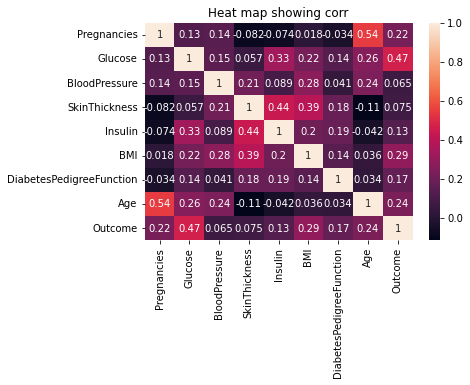

In [10]:
#Data visulization (Heat map)
plt.title("Heat map showing corr")
sns.heatmap(df.corr(),annot=True);

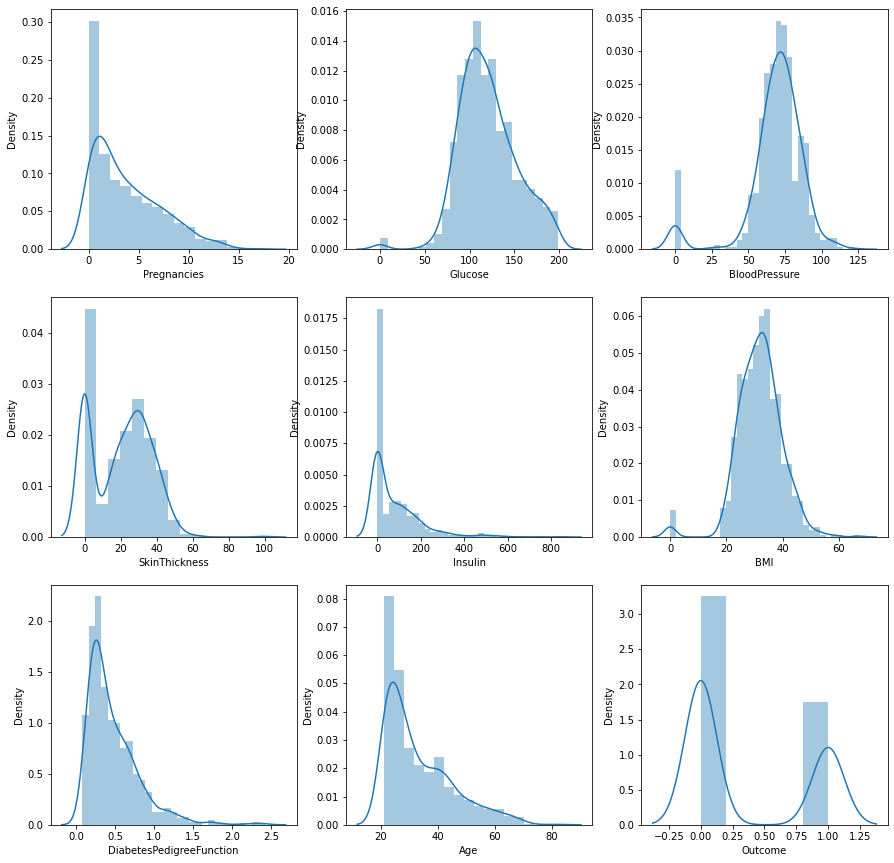

In [11]:
#Data visulization (Check of skewness in cols for all col using disity plot)
df_col=df.columns
fig,ax=plt.subplots(nrows=3,ncols=3,figsize=[15,15])
for col, sub in zip(df_col,ax.flatten()):
    sns.distplot(df[col],ax=sub);

Concluion=Most of the cols seem to be right skewed and normally distrubuted.

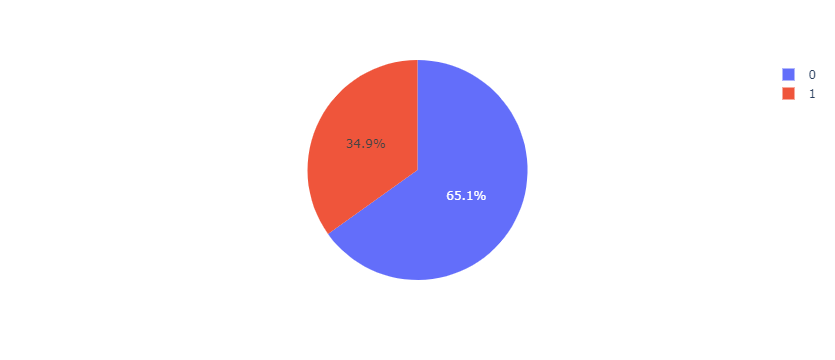

In [12]:
#Data visulization (Pie chart of target col)
px.pie(data_frame=df,names=df["Outcome"])

Conclusio=34.9% of people have diabetis and 65.1 have no diabetis.

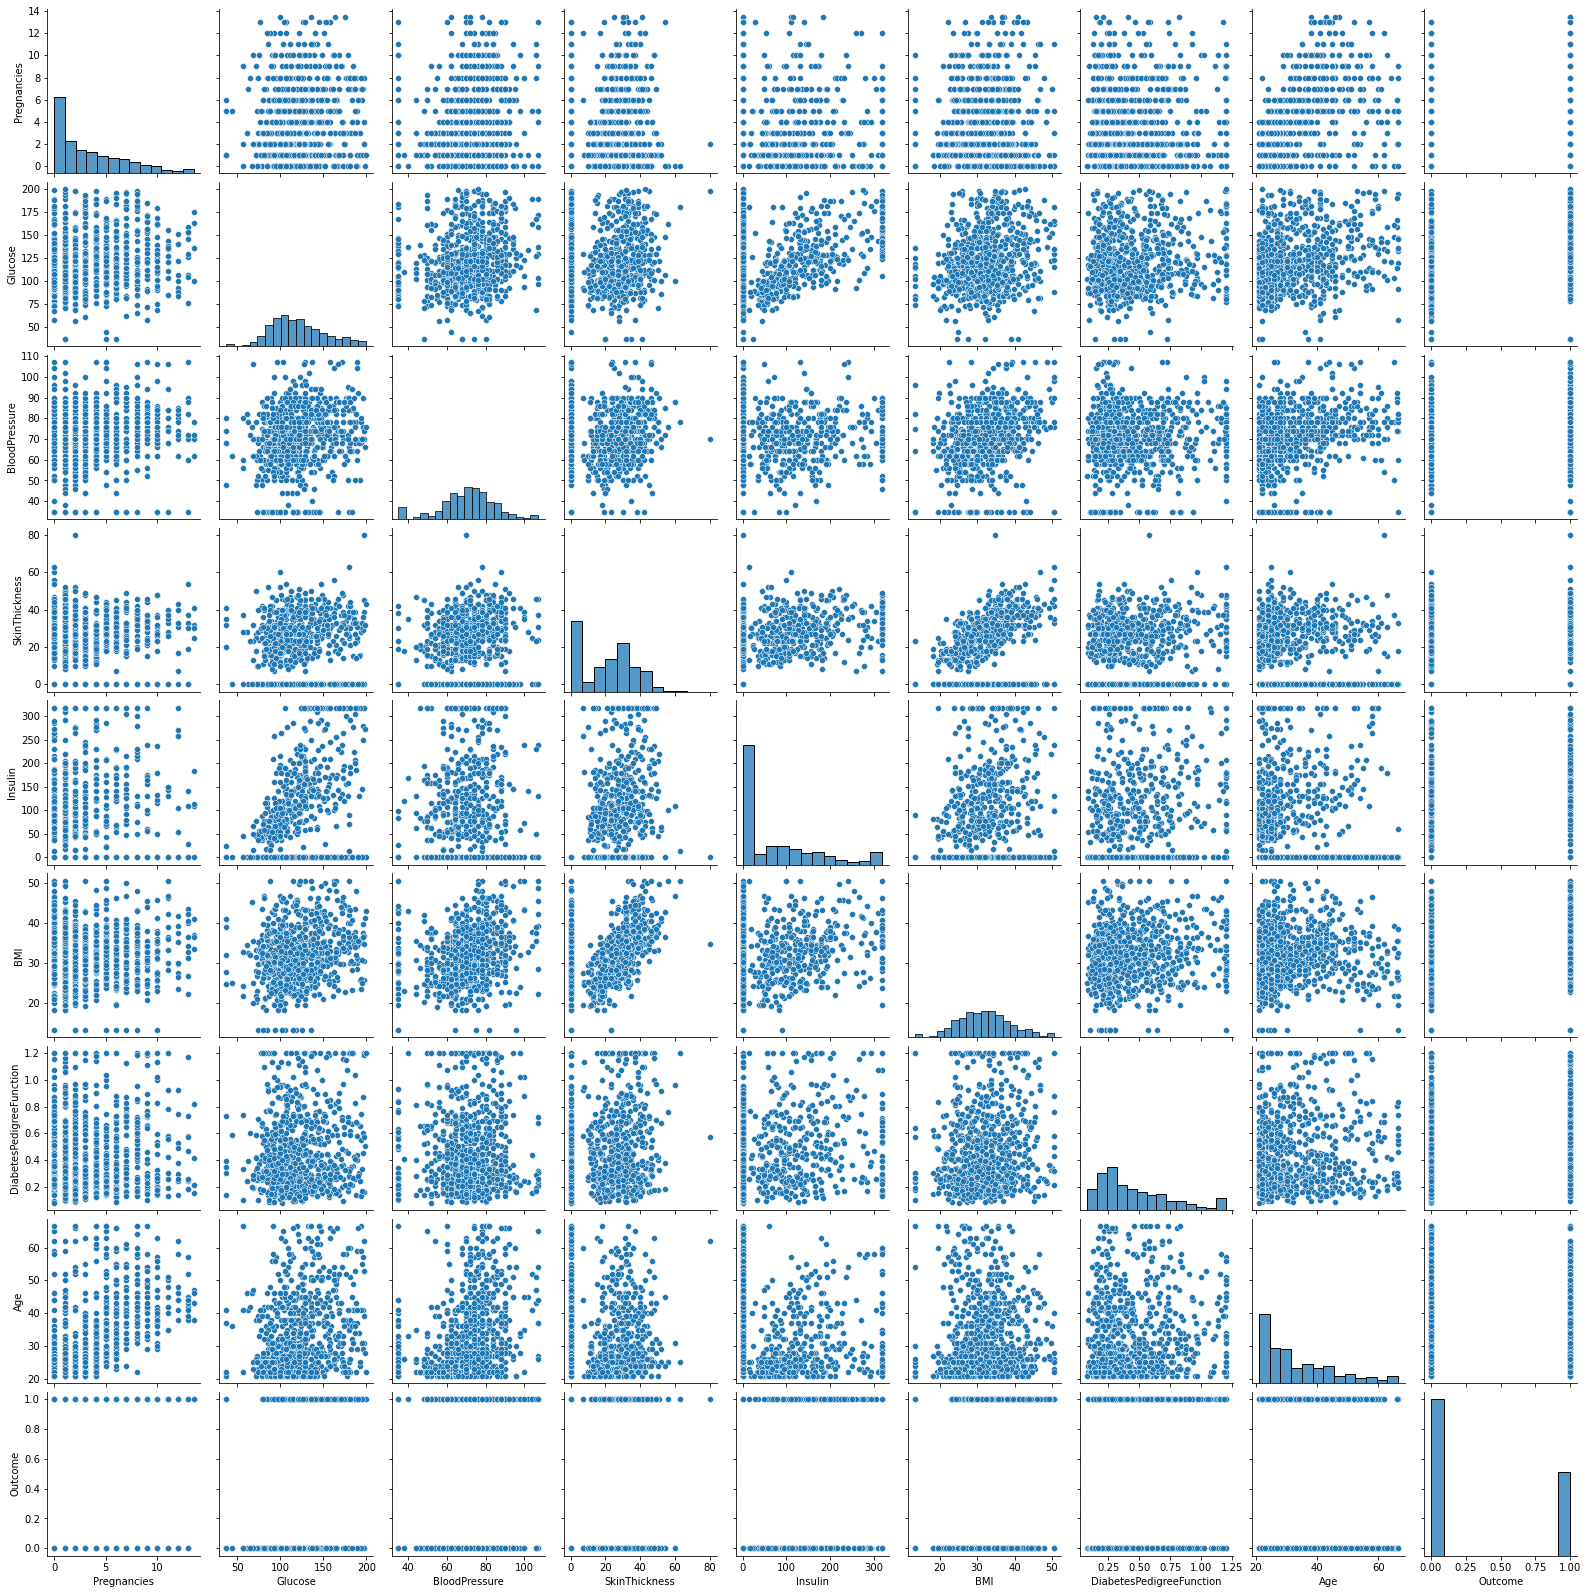

In [33]:
#Data visulization using pair plot
sns.pairplot(data=df)

In [13]:
#Duplicate values
df.duplicated().sum()

0

Conclusion=There are no duplicate values.

In [35]:
#EDA (Skewness)
df.skew()

Pregnancies                 0.853962
Glucose                     0.417946
BloodPressure              -0.406036
SkinThickness               0.026663
Insulin                     1.173898
BMI                         0.135809
DiabetesPedigreeFunction    1.024428
Age                         1.067170
Outcome                     0.635017
dtype: float64

Concluion=Most of the values of skewness are near to zero hence there seems to be more normal distrubution.There is also negative value for col BloodPressure hence that means thats left skewed all else are right skewed but not very much very slightly.

<AxesSubplot:>

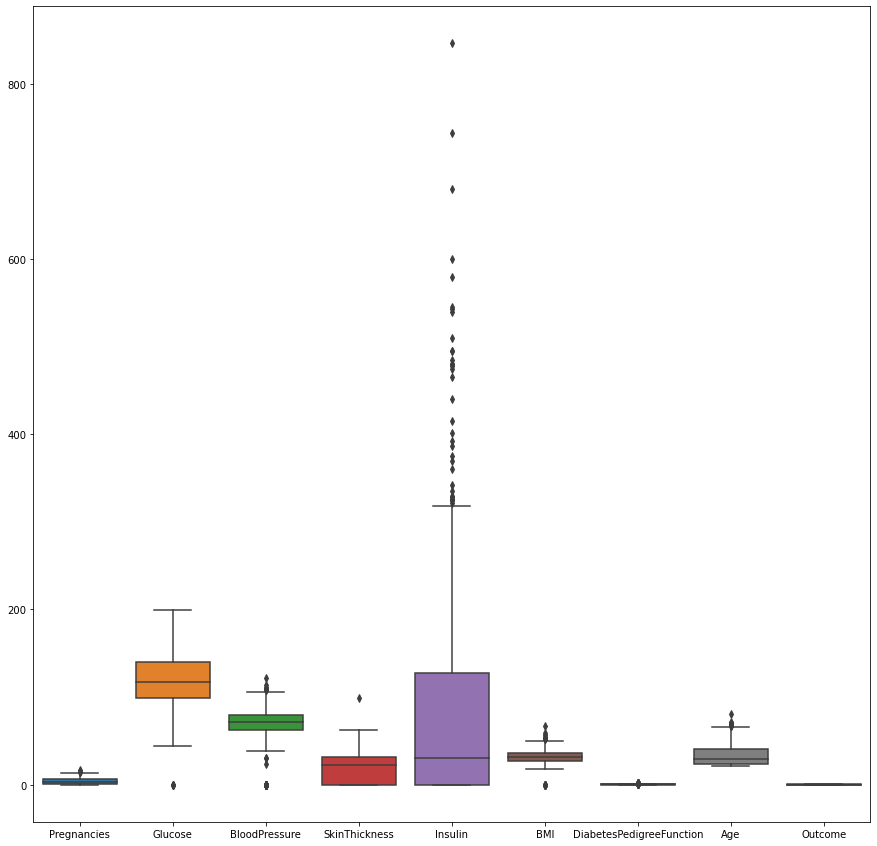

In [14]:
#Outliers detection
plt.rcParams["figure.figsize"]=[15,15]
sns.boxplot(data=df)

Concluion=There are outliers present and we need to treat them.

In [15]:
#Treatmnt of outliers
#Pregnancies
q1=df["Pregnancies"].quantile(0.25)
q3=df["Pregnancies"].quantile(0.75)
iqr=q3-q1
mx=q3+(1.5*iqr)
mn=q1-(1.5*iqr)
df["Pregnancies"]=np.where(df["Pregnancies"]>mx,mx,df["Pregnancies"])

In [16]:
#Treatmnt of outliers
#Glucose
q1=df["Glucose"].quantile(0.25)
q3=df["Glucose"].quantile(0.75)
iqr=q3-q1
mx=q3+(1.5*iqr)
mn=q1-(1.5*iqr)
df["Glucose"]=np.where(df["Glucose"]<mn,mn,df["Glucose"])

In [17]:
#Treatmnt of outliers
#Blood pressure
q1=df["BloodPressure"].quantile(0.25)
q3=df["BloodPressure"].quantile(0.75)
iqr=q3-q1
mx=q3+(1.5*iqr)
mn=q1-(1.5*iqr)
df["BloodPressure"]=np.where(df["BloodPressure"]>mx,mx,df["BloodPressure"])
df["BloodPressure"]=np.where(df["BloodPressure"]<mn,mn,df["BloodPressure"])

In [18]:
#Treatmnt of outliers
#Skin thickness
q1=df["SkinThickness"].quantile(0.25)
q3=df["SkinThickness"].quantile(0.75)
iqr=q3-q1
mx=q3+(1.5*iqr)
mn=q1-(1.5*iqr)
df["SkinThickness"]=np.where(df["SkinThickness"]>mx,mx,df["SkinThickness"])

In [19]:
#Treatmnt of outliers
#Insulin
q1=df["Insulin"].quantile(0.25)
q3=df["Insulin"].quantile(0.75)
iqr=q3-q1
mx=q3+(1.5*iqr)
mn=q1-(1.5*iqr)
df["Insulin"]=np.where(df["Insulin"]>mx,mx,df["Insulin"])

In [20]:
#Treatmnt of outliers
#BMI
q1=df["BMI"].quantile(0.25)
q3=df["BMI"].quantile(0.75)
iqr=q3-q1
mx=q3+(1.5*iqr)
mn=q1-(1.5*iqr)
df["BMI"]=np.where(df["BMI"]>mx,mx,df["BMI"])
df["BMI"]=np.where(df["BMI"]<mn,mn,df["BMI"])

In [21]:
#Treatmnt of outliers
#DiabetesPedigreeFunction
q1=df["DiabetesPedigreeFunction"].quantile(0.25)
q3=df["DiabetesPedigreeFunction"].quantile(0.75)
iqr=q3-q1
mx=q3+(1.5*iqr)
mn=q1-(1.5*iqr)
df["DiabetesPedigreeFunction"]=np.where(df["DiabetesPedigreeFunction"]>mx,mx,df["DiabetesPedigreeFunction"])

In [22]:
#Treatmnt of outliers
#Age
q1=df["Age"].quantile(0.25)
q3=df["Age"].quantile(0.75)
iqr=q3-q1
mx=q3+(1.5*iqr)
mn=q1-(1.5*iqr)
df["Age"]=np.where(df["Age"]>mx,mx,df["Age"])

<AxesSubplot:>

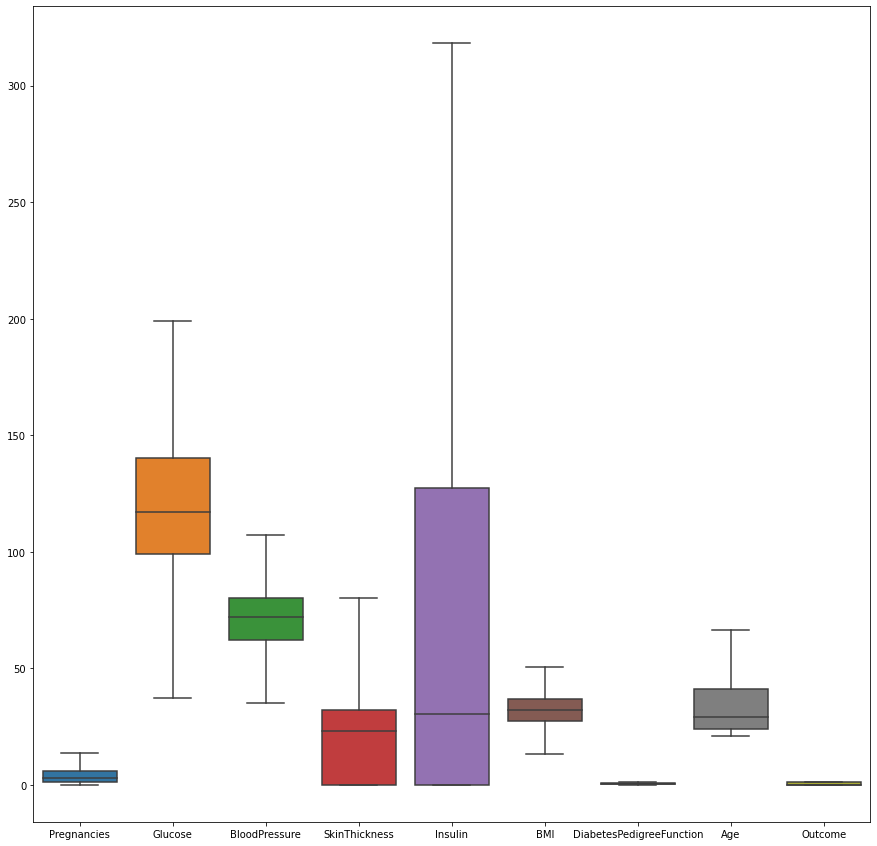

In [23]:
#Outliers detection
plt.rcParams["figure.figsize"]=[15,15]
sns.boxplot(data=df)

Conclusion=The outliers have gone.

In [24]:
#Standardization
X=df.drop("Outcome",axis=1)
y=df["Outcome"]
ss=StandardScaler()
scaledx=ss.fit_transform(X)

In [25]:
#Train test split
X_train,X_test,y_train,y_test=train_test_split(scaledx,y,train_size=0.7,random_state=42)

In [26]:
#Model instantiation
model=LogisticRegression(solver='lbfgs')

In [27]:
#Fit into the model
model.fit(X_train,y_train)

LogisticRegression()

In [28]:
#Training score
model.score(X_train,y_train)

0.7858472998137802

Concluion=The training score is good.

In [29]:
#Testing score
model.score(X_test,y_test)

0.7445887445887446

Concluion=The testing score is good

In [30]:
#Confusion Matrix
y_predicted=model.predict(X_test)
cm=confusion_matrix(y_test,y_predicted)
cm

array([[123,  28],
       [ 31,  49]], dtype=int64)

In [31]:
#Parameters to calculate Accuracy,Precison and Recall
TP=cm[0][0]
FP=cm[0][1]
TN=cm[1][1]
FN=cm[1][0]
print("Accuracy is",((TP+TN))/(TP+FP+FN+TN))
print("Presion is",TP/(TP+FP))
print("Recall is",TP/(TP+FN))

Accuracy is 0.7445887445887446
Presion is 0.8145695364238411
Recall is 0.7987012987012987


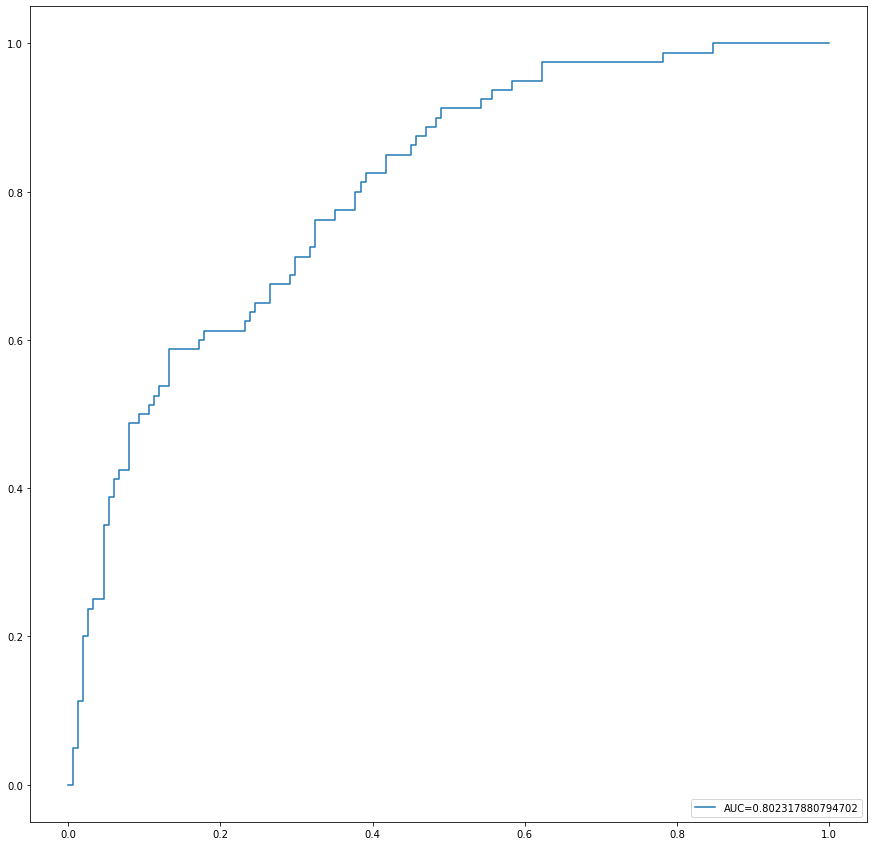

In [32]:
#ROC Curve
y_predicted_prob=model.predict_proba(X_test)[::,-1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_predicted_prob)
auc = metrics.roc_auc_score(y_test, y_predicted_prob)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

Coclusion=The AUC IS 0.8023 which is pretty good value hence the model is also good.

# Thank You